![https://cdn.vox-cdn.com/thumbor/e7gqbRaKlqL9bYNVWlx2ERJZ27o=/4x0:981x651/1200x800/filters:focal(4x0:981x651)/cdn.vox-cdn.com/uploads/chorus_image/image/49316019/Screen_Shot_2015-05-08_at_12.32.14_PM.0.0.png]

# Microsoft Studios: Rise to the Surface

**Authors:** Aaron Cherry, Erin Vu

## Overview

We will be using datasets from IMDB (The Internet Movie Database) and TNDB (The Numbers Database) to conduct exploratory data analysis in order to identify patterns and behaviours behind what makes a movie successful in the box office and then recommend them to stakeholders. 

The results of our analysis indicates we should hire top directors such as Christopher Nolan, Adrian Molina, Lee Unkrich, Pete Docter, and others. For actors we would recommend bringing on Chris Evans as a lead actor and Jennifer Garner as a lead actress for our movies We also found that the best time to release our action, adventure, and sci-fi genre movies is in May.



## Business Problem

Starting a movie studio in today's market can be extremely challenging with huge key name competitors sweeping the market. We want our studio to explode onto the scene with hit after hit by trying to identify successful trends and patterns behind what makes a movie successful. We asked ourselves the following questions:
- Who we can onboard to the team?
- The type of content to create?
- When to structure our releases?

Identifying these successful trends and behaviours and then emulating them will enable our new studio to keep costs low, maximize profit, and become a mighty competitor and successful in the movie industry.

   ## Data Understanding

Our data comes from iMDB and TNDB. Both of these are online databases with information about movies. iMDB contains breadth of information about movies and we will be using their average rating, directors, actors, and actresses who worked on them, genres, and number of votes. TNDB contains information in which we will use the movies' release date, production budget, and it's worldwide gross.

IMDB
 - 73,856 ratings
 - 331,703 movie titles
 - 1,028,186 employees
 
TNDB
 - 5,782 movies, budget, and gross

We will be using these datasets to isolate the top rating directors with top rating actor/actresses, identify what type of content to produce, and find the best time to release a movie.

### Import Libraries and Data

- Import our relevant libraries
- Import data

In [1]:
!pip install fuzzywuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

C:\Users\Erin Vu\anaconda3\envs\learn-env\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
imdb_title_df    = pd.read_csv    ('../zippedData/imdb.title.basics.csv.gz')
imdb_ratings     = pd.read_csv    ('../zippedData/imdb.title.ratings.csv.gz')
imdb_principals  = pd.read_csv    ('../zippedData/imdb.title.principals.csv.gz')
imdb_akas        = pd.read_csv    ('../zippedData/imdb.title.akas.csv.gz')
imdb_crew        = pd.read_csv    ('../zippedData/imdb.title.crew.csv.gz')
imdb_name_basics = pd.read_csv    ('../zippedData/imdb.name.basics.csv.gz')
tn_df            = pd.read_csv    ('../zippedData/tn.movie_budgets.csv.gz', index_col=0)

## Directors, Actors, and Actresses

### Data Preparation for Directors and Actors/Actresses

In this section, we will be merging the different IMDB sets and then again merging the TNDB set to get the average rating of each director, actor, and actress.

 - Below we can observe that the two sets can be merged on the title_id and tconst. We will change the column label to match the other in order to merge successfully. 

In [3]:
imdb_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [4]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
imdb_akas.rename(columns = {'title_id': 'tconst'}, inplace=True)


 - Now that we can merge the two tables on the 'tconst', we inner merged the imdb_ratings to the imdb_akas to get movies with ratings.

In [6]:
imdb_df = pd.merge(imdb_akas, imdb_ratings, on='tconst', how='inner')
imdb_df.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338


 - Now we will be merging the imdb_principals set with the imdb_name_basics on the  'nconst' to get the name of person and the movie they worked on.

In [7]:
people_df = pd.merge(imdb_principals, imdb_name_basics, on='nconst', how='inner')
people_df

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
...,...,...,...,...,...,...,...,...,...,...,...
1027907,tt9689618,3,nm10439724,actor,NaN,NaN,Phillippe Warner,NaN,NaN,NaN,NaN
1027908,tt9689618,5,nm10439725,director,NaN,NaN,Xavi Herrero,NaN,NaN,"director,writer,cinematographer",tt9689618
1027909,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN
1027910,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302"


 - We will merge these two new tables on the 'tconst' to have every movie with a record of each director, actor, and actress on a movie.

In [8]:
imdb_df_people_df = pd.merge(imdb_df, people_df, on='tconst', how='inner')
imdb_df_people_df

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,averagerating,numvotes,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338,1,nm0695435,actor,NaN,"[""Owen""]",Chris Pratt,1979.0,NaN,"actor,soundtrack,producer","tt1490017,tt0369610,tt1266020,tt2015381"
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338,2,nm0397171,actress,NaN,"[""Claire""]",Bryce Dallas Howard,1981.0,NaN,"actress,director,writer","tt1454029,tt0369610,tt1800302"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338,10,nm0189777,producer,producer,NaN,Patrick Crowley,NaN,NaN,"producer,assistant_director,production_manager","tt0372183,tt1059786,tt0258463,tt0440963"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338,3,nm1339223,actor,NaN,"[""Gray""]",Ty Simpkins,NaN,NaN,actor,"tt0369610,tt1300854,tt4154796,tt1591095"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338,4,nm0339460,actress,NaN,"[""Karen""]",Judy Greer,1975.0,NaN,"actress,producer,soundtrack","tt0369610,tt0337563,tt0478970,tt0988595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422861,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,7.7,6,2,nm5862455,actress,NaN,"[""Reo""]",Nana Komatsu,NaN,NaN,"actress,soundtrack","tt4912452,tt0490215,tt5108912,tt3108158"
2422862,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,7.7,6,4,nm5527231,actor,NaN,NaN,Takaya Aoyagi,1985.0,NaN,actor,"tt7772394,tt6344334,tt6344302,tt5678870"
2422863,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,7.7,6,3,nm6954008,actor,NaN,"[""Shima""]",Ryô Narita,NaN,NaN,actor,"tt10127410,tt5311514,tt5031744,tt8531044"
2422864,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0,7.7,6,10,nm4869921,actor,NaN,NaN,Masaki Naito,1981.0,NaN,actor,"tt7268368,tt2267524,tt9827784,tt3502172"


Below, we will be filtering out international and duplicate movie titles
 - we will be subsetting the 'region' to the US to get the standard US title
 - we will also filter out a few duplicate titles for some of the different releases of the same movie

In [9]:
imdb_df_people_df['attributes'].value_counts()

new title                      12668
alternative spelling           11384
original subtitled version      8184
literal English title           7661
complete title                  7513
                               ...  
second season title               10
first episode title                6
X-rated version                    6
unauthorized video title           6
reissue titleshort version        4
Name: attributes, Length: 76, dtype: int64

In [10]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['region'] == 'US']

In [11]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'fake working title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'promotional title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'working']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'IMAX version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'poster title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != '3-D version']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'director\'s cut']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'alternative spelling']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'informal alternative title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'long title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['attributes'] != 'short title']
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['types'] != 'alternative']

Below, we will be filtering out low votes and no votes as we want to get the directors, actors, and actresses from  highly rated movies.
 - we will filter out movies with less than 10,000 votes

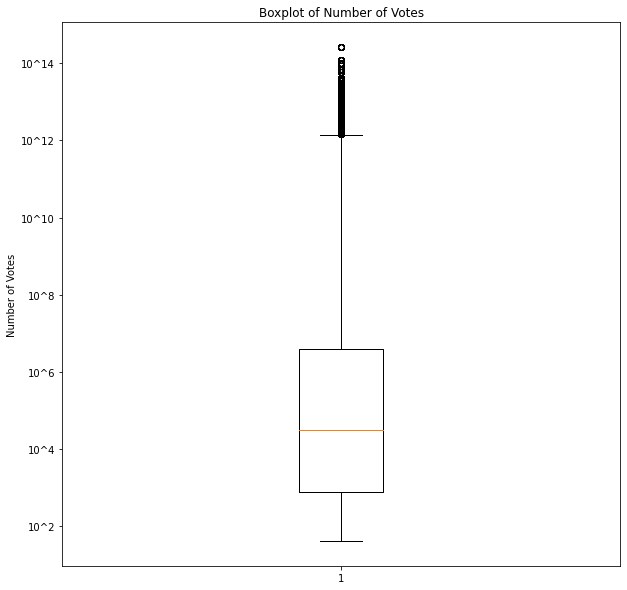

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(np.log(imdb_df_people_df['numvotes'].dropna()));
ax.set_yticks(np.arange(2, 15, 2))
ax.set_yticklabels(['10^2', '10^4', '10^6', '10^8', '10^10', '10^12', '10^14'])
ax.set_ylabel('Number of Votes')
ax.set_title('Boxplot of Number of Votes');

In [13]:
imdb_df_people_df = imdb_df_people_df[imdb_df_people_df['numvotes'] >= 10000]
imdb_df_people_df = imdb_df_people_df.dropna(subset=['numvotes'])

We will clean up our dataset to only include relevant columns

In [14]:
imdb_df_people_df = imdb_df_people_df[['tconst', 'title', 'averagerating', 'numvotes', 'category', 'primary_name', 'nconst']]

Now we will merge our merged imdb_df_people_df to tn_db to attach a production budget, release date, and worldwide gross to each movie.
 - update tn_db monetary values to floats
 - update tn_db release dates to date time
 - we will need to change the column header in tn_df from movie to title to merge them together


In [15]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [16]:
tn_df.rename(columns = {'movie': 'title'}, inplace=True)

In [17]:
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(',','')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$','')
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(float)

tn_df['production_budget'] = tn_df['production_budget'].str.replace(',','')
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$','')
tn_df['production_budget'] = tn_df['production_budget'].astype(float)

tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(',','')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$','')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(float)

tn_df['release_dates'] = pd.DatetimeIndex(tn_df.release_date)

In [18]:
imdb_tndb = pd.merge(imdb_df_people_df, tn_df, on='title', how='inner')
imdb_tndb

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,release_dates
0,tt0369610,Jurassic World,7.0,539338,actor,Chris Pratt,nm0695435,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
1,tt0369610,Jurassic World,7.0,539338,actress,Bryce Dallas Howard,nm0397171,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
2,tt0369610,Jurassic World,7.0,539338,producer,Patrick Crowley,nm0189777,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
3,tt0369610,Jurassic World,7.0,539338,actor,Ty Simpkins,nm1339223,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
4,tt0369610,Jurassic World,7.0,539338,actress,Judy Greer,nm0339460,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...
12007,tt6139732,Aladdin,7.4,57549,actress,Naomi Scott,nm4305463,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,1992-11-11
12008,tt6139732,Aladdin,7.4,57549,producer,Jonathan Eirich,nm3043818,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,2019-05-24
12009,tt6139732,Aladdin,7.4,57549,producer,Jonathan Eirich,nm3043818,"Nov 11, 1992",28000000.0,217350219.0,5.040502e+08,1992-11-11
12010,tt6139732,Aladdin,7.4,57549,composer,Alan Menken,nm0579678,"May 24, 2019",182000000.0,246734314.0,6.192343e+08,2019-05-24


We will be adding profit margin column and ratio of production budget to worldwide gross to our imdb_tndb dataframe.

In [19]:
imdb_tndb['Profit_Margin'] = ((imdb_tndb['worldwide_gross'] - imdb_tndb['production_budget']) / imdb_tndb['worldwide_gross'])*100
imdb_tndb['ratio_budget_gross'] = (imdb_tndb['production_budget'] / imdb_tndb['worldwide_gross'])
imdb_tndb['ratio_budget_gross_%'] = imdb_tndb['ratio_budget_gross']*100

Now we will filter out rows in which the worldwide gross is $0.00

In [20]:
imdb_tndb = imdb_tndb[imdb_tndb['worldwide_gross'] > 0]

Filtering out movies before our selected time frame of 1960 and isolating the year of each movie release.

In [21]:
imdb_tndb = imdb_tndb[imdb_tndb['release_dates'] >= '1960-01-01']

In [22]:
imdb_tndb['years'] = imdb_tndb['release_dates'].dt.year

Now we will filter out directors and actors/actresses for each  movie and sort by ratings to get the highest rating director and by count to get a good representation of the trend of actors/actresses over the years and then finally remove duplicates.

In [23]:
directors = imdb_tndb[imdb_tndb['category'] == 'director']
performers = imdb_tndb[(imdb_tndb['category'] == 'actor') | (imdb_tndb['category'] == 'actress')]

In [24]:
directors = directors.sort_values(by='tconst', ascending=False)
directors.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

performers = performers.sort_values(by='averagerating', ascending=False)
performers.drop_duplicates(subset=['primary_name', 'title', 'tconst', 'nconst'], keep='first', inplace=True)

In [25]:
directors

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,release_dates,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
11067,tt8632862,Fahrenheit 11/9,6.7,11628,director,Michael Moore,nm0601619,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,2018-09-21,24.854010,0.751460,75.145990,2018
11055,tt8155288,Happy Death Day 2U,6.3,27462,director,Christopher Landon,nm0484907,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2019-02-13,85.976830,0.140232,14.023170,2019
10971,tt7961060,Dragon Ball Super: Broly,8.0,16465,director,Tatsuya Nagamine,nm0619110,"Jan 16, 2019",8500000.0,30376755.0,1.227478e+08,2019-01-16,93.075230,0.069248,6.924770,2019
11301,tt7784604,Hereditary,7.3,151571,director,Ari Aster,nm4170048,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,2018-06-08,85.741561,0.142584,14.258439,2018
11853,tt7634968,What Men Want,4.9,10141,director,Adam Shankman,nm0788202,"Feb 8, 2019",20000000.0,54611903.0,6.991190e+07,2019-02-08,71.392568,0.286074,28.607432,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,tt0383010,The Three Stooges,5.1,28570,director,Peter Farrelly,nm0268380,"Apr 13, 2012",30000000.0,44338224.0,5.405225e+07,2012-04-13,44.498147,0.555019,55.501853,2012
351,tt0383010,The Three Stooges,5.1,28570,director,Bobby Farrelly,nm0268370,"Apr 13, 2012",30000000.0,44338224.0,5.405225e+07,2012-04-13,44.498147,0.555019,55.501853,2012
577,tt0376136,The Rum Diary,6.2,94787,director,Bruce Robinson,nm0732430,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,2011-10-28,-108.867764,2.088678,208.867764,2011
5,tt0369610,Jurassic World,7.0,539338,director,Colin Trevorrow,nm1119880,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12,86.960647,0.130394,13.039353,2015


In [26]:
performers

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,release_dates,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
625,tt1375666,Inception,8.8,1841066,actor,Joseph Gordon-Levitt,nm0330687,"Jul 16, 2010",160000000.0,292576195.0,835524642.0,2010-07-16,80.850355,0.191496,19.149645,2010
623,tt1375666,Inception,8.8,1841066,actor,Leonardo DiCaprio,nm0000138,"Jul 16, 2010",160000000.0,292576195.0,835524642.0,2010-07-16,80.850355,0.191496,19.149645,2010
621,tt1375666,Inception,8.8,1841066,actor,Ken Watanabe,nm0913822,"Jul 16, 2010",160000000.0,292576195.0,835524642.0,2010-07-16,80.850355,0.191496,19.149645,2010
614,tt1375666,Inception,8.8,1841066,actress,Ellen Page,nm0680983,"Jul 16, 2010",160000000.0,292576195.0,835524642.0,2010-07-16,80.850355,0.191496,19.149645,2010
961,tt0816692,Interstellar,8.6,1299334,actress,Anne Hathaway,nm0004266,"Nov 5, 2014",165000000.0,188017894.0,666379375.0,2014-11-05,75.239330,0.247607,24.760670,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10911,tt5690360,Slender Man,3.2,19650,actress,Jaz Sinclair,nm3596959,"Aug 10, 2018",10000000.0,30564825.0,51723644.0,2018-08-10,80.666482,0.193335,19.333518,2018
1177,tt2467046,Left Behind,3.1,33515,actress,Lea Thompson,nm0000670,"Oct 3, 2014",16000000.0,14019924.0,20769209.0,2014-10-03,22.962882,0.770371,77.037118,2014
1181,tt2467046,Left Behind,3.1,33515,actress,Cassi Thomson,nm2216125,"Oct 3, 2014",16000000.0,14019924.0,20769209.0,2014-10-03,22.962882,0.770371,77.037118,2014
1175,tt2467046,Left Behind,3.1,33515,actor,Chad Michael Murray,nm0614877,"Oct 3, 2014",16000000.0,14019924.0,20769209.0,2014-10-03,22.962882,0.770371,77.037118,2014


## Data Modeling for Director's, Actors, and Actresses

We grouped the dataframes by each individual in order to get the average rating of all of their works in our dataframe. We will consider this rating as their rating for the purposes of our analysis.

#### Directors

 - we will filter out the directors with worldwide gross less than $150,000,000 and take the top 10

In [27]:
director_avg = directors.groupby('primary_name').mean()
director_avg.sort_values(by='averagerating', ascending=False, inplace=True)

In [28]:
directors_gross_df = director_avg[director_avg['worldwide_gross'] > 150000000]
directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)
top_10_directors = directors_gross_df[:10]

<ipython-input-28-d1698c26b0ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_gross_df.sort_values(by='averagerating', ascending=False, inplace=True)


In [29]:
director_budget = top_10_directors['production_budget'].values[:10]
top_10_directors_names = top_10_directors['production_budget'].index[:10]
directors_gross = top_10_directors['worldwide_gross'].values[:10]

<ipython-input-30-fac4a7d61fab>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel('Director', Fontsize=16)
<ipython-input-30-fac4a7d61fab>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('In $100m', Fontsize=16)
<ipython-input-30-fac4a7d61fab>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_directors_names, rotation=18, fontsize=14)
<ipython-input-30-fac4a7d61fab>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);


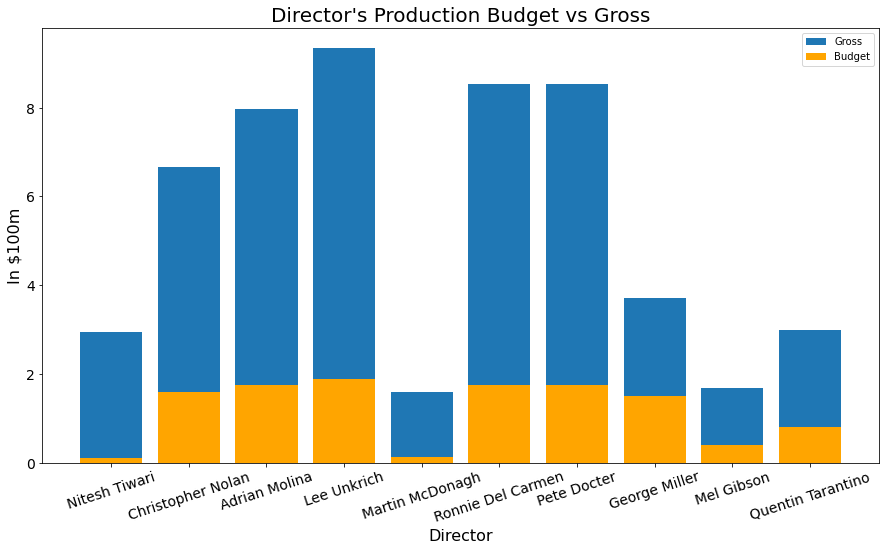

In [30]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(top_10_directors_names, directors_gross)
ax.bar(top_10_directors_names, director_budget, color='orange')
ax.set_xlabel('Director', Fontsize=16)
ax.set_ylabel('In $100m', Fontsize=16)
ax.set_title('Director\'s Production Budget vs Gross', fontsize=20)
ax.legend(['Gross', 'Budget'])
ax.set_xticklabels(top_10_directors_names, rotation=18, fontsize=14)
ax.set_yticklabels(['0', '2', '4', '6', '8'], fontsize=14);
plt.savefig('../images/Director_avg_budget_vs_avg_gross_figure',bbox_inches='tight')

#### Actor and Actress

- we will group by each actor/actress and get the count of the movies they have starred in in order to get a good picture of their overall rating over the years
- we will then go through the names to identify which stars are upward trending throughout the years

In [31]:
performers_count = performers.groupby('primary_name').count()
performers_count.sort_values(by='title', ascending=False, inplace=True)
performers_count[:15]

,tconst,title,averagerating,numvotes,category,nconst,release_date,production_budget,domestic_gross,worldwide_gross,release_dates,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
primary_name,,,,,,,,,,,,,,,
Dwayne Johnson,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Mark Wahlberg,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Channing Tatum,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Steve Carell,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Matthew McConaughey,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Robert De Niro,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Owen Wilson,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Jennifer Lawrence,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Kevin Hart,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


Male Actor Recommendation

In [32]:
actor_male = performers[performers['primary_name'] == 'Chris Evans']

In [33]:
actor_male = actor_male[actor_male['years'] >= 2000]
actor_male = actor_male.sort_values(by='years', ascending=True)

In [34]:
actor_male

,tconst,title,averagerating,numvotes,category,primary_name,nconst,release_date,production_budget,domestic_gross,worldwide_gross,release_dates,Profit_Margin,ratio_budget_gross,ratio_budget_gross_%,years
8338,tt0480255,The Losers,6.4,83876,actor,Chris Evans,nm0262635,"Apr 23, 2010",25000000.0,23591432.0,2.986384e+07,2010-04-23,16.286720,0.837133,83.713280,2010
1650,tt0458339,Captain America: The First Avenger,6.9,668137,actor,Chris Evans,nm0262635,"Jul 22, 2011",140000000.0,176654505.0,3.705698e+08,2011-07-22,62.220340,0.377797,37.779660,2011
8956,tt0770703,What's Your Number?,6.1,67922,actor,Chris Evans,nm0262635,"Sep 30, 2011",20000000.0,14011084.0,3.016378e+07,2011-09-30,33.695324,0.663047,66.304676,2011
9564,tt1491044,The Iceman,6.9,65571,actor,Chris Evans,nm0262635,"May 3, 2013",10000000.0,1930282.0,3.623609e+06,2013-05-03,-175.967965,2.759680,275.967965,2013
3408,tt1843866,Captain America: The Winter Soldier,7.8,666252,actor,Chris Evans,nm0262635,"Apr 4, 2014",170000000.0,259746958.0,7.144019e+08,2014-04-04,76.203870,0.237961,23.796130,2014
6350,tt1706620,Snowpiercer,7.1,239264,actor,Chris Evans,nm0262635,"Jun 27, 2014",40000000.0,4563029.0,8.806988e+07,2014-06-27,54.581521,0.454185,45.418479,2014
4431,tt2395427,Avengers: Age of Ultron,7.3,665594,actor,Chris Evans,nm0262635,"May 1, 2015",330600000.0,459005868.0,1.403014e+09,2015-05-01,76.436443,0.235636,23.563557,2015
3736,tt0443465,Before We Go,6.8,45181,actor,Chris Evans,nm0262635,"Sep 4, 2015",3000000.0,37151.0,4.839380e+05,2015-09-04,-519.914121,6.199141,619.914121,2015
9356,tt3498820,Captain America: Civil War,7.8,583507,actor,Chris Evans,nm0262635,"May 6, 2016",250000000.0,408084349.0,1.140069e+09,2016-05-06,78.071511,0.219285,21.928489,2016
10463,tt4481414,Gifted,7.6,82426,actor,Chris Evans,nm0262635,"Apr 7, 2017",7000000.0,24801212.0,3.696466e+07,2017-04-07,81.062992,0.189370,18.937008,2017


<ipython-input-35-eaf3c2195b56>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(actor_male['years'], fontsize=14)
<ipython-input-35-eaf3c2195b56>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


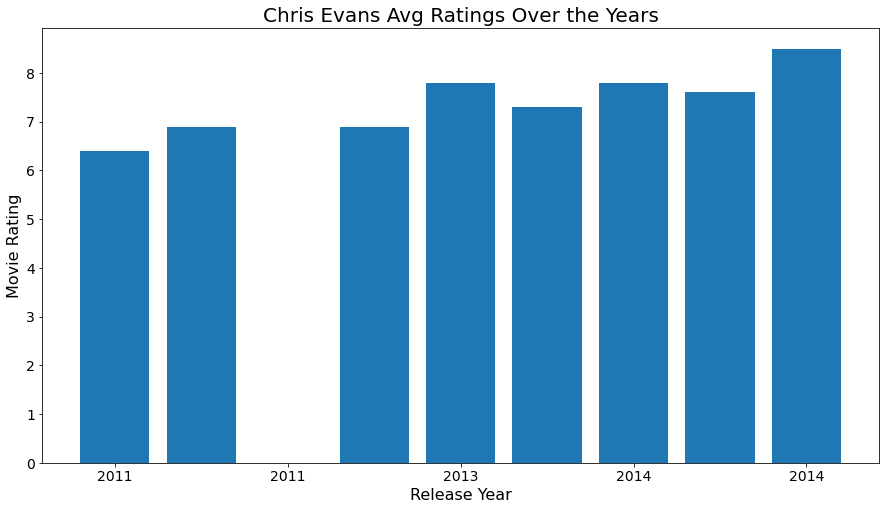

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_male['years'], actor_male['averagerating'])
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Chris Evans Avg Ratings Over the Years', fontsize=20);
ax.set_xticklabels(actor_male['years'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Chris_evans_ratings_over_years', bbox_inches='tight')

Female Actor Recommendation

In [36]:
actor_female = performers[performers['primary_name'] == 'Jennifer Garner']

In [37]:
actor_female = actor_female[actor_female['years'] >= 2010]
actor_female = actor_female.sort_values(by='years', ascending=True)

<ipython-input-38-042c57fb059c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14)
<ipython-input-38-042c57fb059c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);


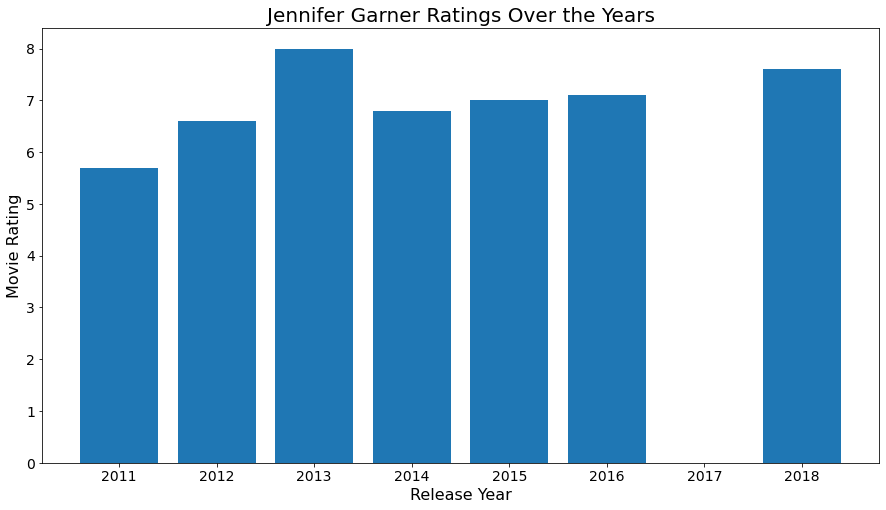

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(actor_female['years'], actor_female['averagerating'] )
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Movie Rating', fontsize=16)
ax.set_title('Jennifer Garner Ratings Over the Years', fontsize=20)
ax.set_xticklabels(['0', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], fontsize=14)
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14);
plt.savefig('../images/Jennifer_garner_ratings_over_years',bbox_inches='tight')

## Seasonal Release Schedule and Content Production

In this section, we will explore when to release a movie and the type of movie to produce.

In [39]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   object        
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
 5   release_dates      5782 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 316.2+ KB


We will add day, month, and year columns to the dataset.

In [40]:
tn_df['day_of_week'] = tn_df.release_dates.dt.dayofweek
tn_df['day'] = tn_df.release_dates.dt.day
tn_df['month'] = tn_df.release_dates.dt.month
tn_df['year']  = tn_df.release_dates.dt.year

- Find the year range of the set

In [41]:
tn_df.year.min(),tn_df.year.max()

(1915, 2020)

- Filter out our target years of 1960 onward.
- Filter out budgets and grosses to make sure they aren't zero

In [42]:
tn_df = tn_df[tn_df['year'] > 1960]

In [43]:
tn_df = tn_df[(tn_df['production_budget'] > 0.0)]
tn_df = tn_df[tn_df['worldwide_gross'] > 0.0]
tn_df = tn_df[tn_df['domestic_gross'] > 0.0]

### World/Domestic Profits Relative to Month of Release

- Setting up month map for graphing

In [44]:

month_map = {0:'January',1:'Febuary',2:'March',3:'April',4:'May',5:'June',6:'July',7:'August',8:'September',9:'October',10:'November',11:'December'}
color_map = ['tab:blue','tab:blue','tab:blue','tab:blue','tab:green','tab:green','tab:green','tab:blue','tab:blue','tab:blue','tab:green','tab:green']

- Setting up variables that group by month

In [45]:
world_gross_per_movie_by_month = tn_df.groupby('month').sum()['worldwide_gross']/\
    tn_df.groupby('month').count()['title']
domestic_gross_per_movie_by_month = tn_df.groupby('month').sum()['domestic_gross']/\
    tn_df.groupby('month').count()['title']

<ipython-input-46-625fc1641fc5>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Average Net Income/Movie (in Millions)',Fontsize=16)
<ipython-input-46-625fc1641fc5>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Average Income Per Movie Split by Month',Fontsize=20)
<ipython-input-46-625fc1641fc5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(month_map.values()), rotation = 70, Fontsize=14);
<ipython-input-46-625fc1641fc5>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(list(month_map.values()), rotation = 70, Fontsize=14);


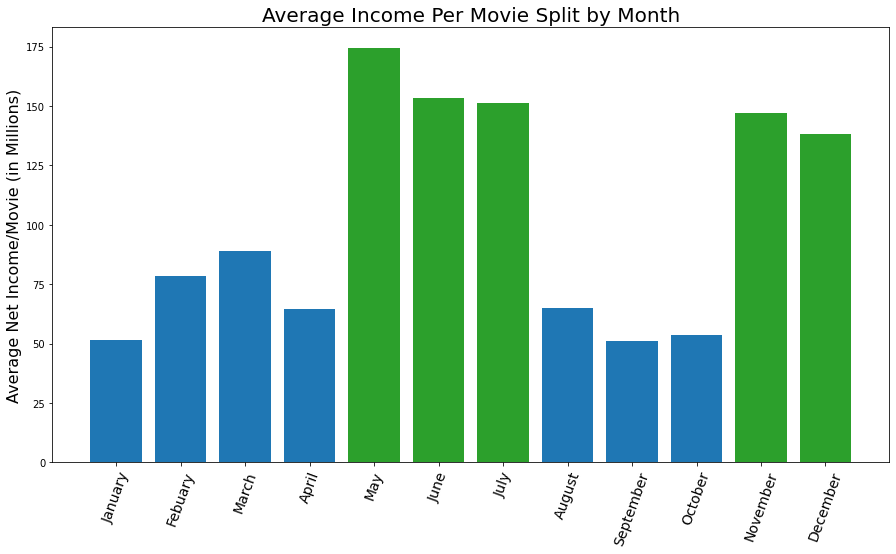

In [46]:

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(month_map.values(),world_gross_per_movie_by_month/1000000\
    ,color=color_map)
ax.set_ylabel('Average Net Income/Movie (in Millions)',Fontsize=16)
ax.set_title('Average Income Per Movie Split by Month',Fontsize=20)
ax.set_xticklabels(list(month_map.values()), rotation = 70, Fontsize=14);
fig.savefig('../images/gross_income_by_month.png', bbox_inches='tight')

This plot of the net profits of films released after 1960 shows the total net profits of movies divided by the number of movies in the month that they were released. This gives an idea of the average net profit per movie given a specific month. Judging from this comparison, it can be concluded that the months that generally yield the most profit for a new release are the summer months of May, June, July and the holiday months of November and December.

### Content Genre

Using iMDB and The Numbers Datasets

In [47]:
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Here we will clean the imdb_title_df and remove rows with Nan for genre and then drop duplicates

In [48]:
imdb_title_df = imdb_title_df.dropna(subset=['genres'])

In [49]:
imdb_title_df = imdb_title_df.drop_duplicates()

Now we will check for movies with the same primary title and different release years and ensure there are no duplicates in 'unique_id'

In [50]:
imdb_title_df['unique_id'] = imdb_title_df['primary_title'] + '_' + imdb_title_df['start_year'].astype(str)

In [51]:
imdb_title_df['unique_id'].value_counts()

Ângelo de Sousa - Tudo o Que Sou Capaz_2010    7
Split_2016                                     6
Alone_2015                                     4
Untitled_2017                                  4
Inside Out_2011                                4
                                              ..
Bhadaas_2013                                   1
King's Game_2011                               1
Ihite Kingdom_2014                             1
All Roads Lead to Occidental_2014              1
A Haunting at Silver Falls: The Return_2019    1
Name: unique_id, Length: 138926, dtype: int64

In [52]:
imdb_title_df[imdb_title_df['unique_id'] == 'Ângelo de Sousa - Tudo o Que Sou Capaz_2010']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,unique_id
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66990,tt3815124,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010
66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60.0,"Biography,Documentary",Ângelo de Sousa - Tudo o Que Sou Capaz_2010


Above, we can observe the 'tconst' column is the only one that does not contain redundancies, so we drop all the others below.

In [53]:
imdb_title_df.drop_duplicates(subset=['unique_id'],inplace=True)

In [54]:
imdb_title_df['unique_id'].value_counts()

Death Forest_2014                              1
Guy and Co_2016                                1
Panman_2011                                    1
Kokkuri-san: Shin toshi densetsu_2014          1
Trippel Trappel Dierensinterklaas_2014         1
                                              ..
Takers_2010                                    1
3rd Night_2017                                 1
Vikadakavi_2011                                1
Le peuple interdit_2016                        1
A Haunting at Silver Falls: The Return_2019    1
Name: unique_id, Length: 138926, dtype: int64

Now we will plot the most popular movie genres in our data

In [55]:
imdb_title_df.groupby('genres').count()['tconst']

genres
Action                        2178
Action,Adult,Comedy              2
Action,Adventure               113
Action,Adventure,Animation     197
Action,Adventure,Biography      34
                              ... 
Thriller,War,Western             1
Thriller,Western                 4
War                            129
War,Western                      1
Western                        142
Name: tconst, Length: 1082, dtype: int64

- We're looking at the genres column which look like lists comma separated

In [56]:
imdb_title_df['genres'] = imdb_title_df['genres'].str.strip().str.replace(',',' ').str.split()

In [57]:
all_genres = []
for index, row in imdb_title_df.iterrows():
    all_genres.extend(row.genres)
unique_genres = set(all_genres)

- First need to separate the genres for each movie and put them into a list.

In [58]:
genres_dict = dict(zip(unique_genres,np.zeros(len(unique_genres))))

In [59]:
for index, row in imdb_title_df.iterrows():
    for genre in genres_dict:
        if genre in row.genres:
            genres_dict[genre] += 1
del genres_dict['Documentary']

- The documentary genre was among the top number of ratings, however we are just looking at boxoffice movies so will not include it.
- Sort the genres dictionary by the amount of movies

In [60]:
genres_dict = {k: v for k, v in sorted(genres_dict.items(), key=lambda item: item[1],reverse=True)}

<ipython-input-61-da283fef68a7>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Number of Movies per Genre (1960-2020)',Fontsize=20)
<ipython-input-61-da283fef68a7>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Number of Movies',Fontsize=16)
<ipython-input-61-da283fef68a7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(genres_dict.keys()), rotation = 70, Fontsize=14);
<ipython-input-61-da283fef68a7>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(list(genres_dict.keys()), rotation = 70, Fontsize=14);


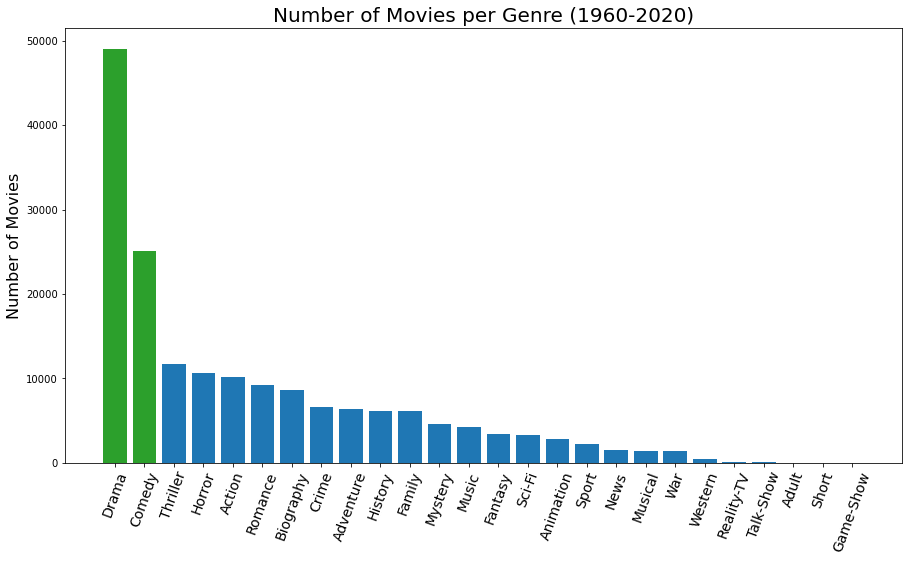

In [61]:
color_map = ['tab:green','tab:green','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue',\
    'tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue'\
        ,'tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue']
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(list(genres_dict.keys()),genres_dict.values(),color=color_map)
ax.set_title('Number of Movies per Genre (1960-2020)',Fontsize=20)
ax.set_ylabel('Number of Movies',Fontsize=16)
ax.set_xticklabels(list(genres_dict.keys()), rotation = 70, Fontsize=14);
fig.savefig('../images/number_of_movies_by_genre.png',bbox_inches='tight')#

- The two most popular genres are Drama and Comedy. We might recommend doing these two assuming that the reason why they are the most popular is that they tend to do the best in the box office.

- Now we want to look at the most popular by average rating in the iMBD data. So we need to do the same thing except tabulate the ratings this time.

- First we need to combine the ratings and basic tables from iMBD. We'll do that on the foreign key 'tconst'

In [62]:
imdb_ratings.tconst.value_counts()

tt2275521    1
tt4550652    1
tt1931601    1
tt1646981    1
tt3822210    1
            ..
tt1379651    1
tt2226437    1
tt2243163    1
tt3265472    1
tt2389122    1
Name: tconst, Length: 73856, dtype: int64

- No duplicates so we can join these tables

In [64]:
imbd_ratings_basic_df = imdb_title_df.set_index('tconst').join(imdb_ratings.set_index('tconst'),how='inner')
imbd_ratings_basic_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,unique_id,averagerating,numvotes
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",Sunghursh_2013,7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",One Day Before the Rainy Season_2019,7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],The Other Side of the Wind_2018,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",Sabse Bada Sukh_2018,6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",The Wandering Soap Opera_2017,6.5,119


In [66]:
imbd_ratings_basic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72300 entries, tt0063540 to tt9916160
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    72300 non-null  object 
 1   original_title   72300 non-null  object 
 2   start_year       72300 non-null  int64  
 3   runtime_minutes  65026 non-null  float64
 4   genres           72300 non-null  object 
 5   unique_id        72300 non-null  object 
 6   averagerating    72300 non-null  float64
 7   numvotes         72300 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


- First step is to reinitialize an empty genre dictionary to populate with empty lists.
- Initialize a new genre dictionary but have empty lists for value.

In [68]:
genres_dict_ratings = {k: [] for k in genres_dict.keys()}
genres_dict_ratings

{'Drama': [],
 'Comedy': [],
 'Thriller': [],
 'Horror': [],
 'Action': [],
 'Romance': [],
 'Biography': [],
 'Crime': [],
 'Adventure': [],
 'History': [],
 'Family': [],
 'Mystery': [],
 'Music': [],
 'Fantasy': [],
 'Sci-Fi': [],
 'Animation': [],
 'Sport': [],
 'News': [],
 'Musical': [],
 'War': [],
 'Western': [],
 'Reality-TV': [],
 'Talk-Show': [],
 'Adult': [],
 'Short': [],
 'Game-Show': []}

- Now we need to populate the lists with average ratings.

In [70]:
for index, row in imbd_ratings_basic_df.iterrows():
    for genre in genres_dict_ratings.keys():
        if genre in row.genres:
            genres_dict_ratings[genre].append(row.numvotes)

- now that we have a list of average ratings per genre, we can go ahead and take the average of the average.

In [71]:
ave_genres_dict_ratings = {k: np.mean(v) for k,v in genres_dict_ratings.items() if v}

- Now sort the genres by average rating

In [72]:
ave_genres_dict_ratings = {k: v for k, v in sorted(ave_genres_dict_ratings.items(), key=lambda item: item[1],reverse=True)}

Remove all of the show content to isolate the movie genres

In [73]:
del ave_genres_dict_ratings['Short']
del ave_genres_dict_ratings['Reality-TV']

In [74]:
ave_genres_dict_ratings.keys()

dict_keys(['Adventure', 'Sci-Fi', 'Action', 'Fantasy', 'Animation', 'Western', 'Crime', 'Mystery', 'Thriller', 'Biography', 'Comedy', 'Romance', 'Drama', 'Sport', 'War', 'Horror', 'History', 'Music', 'Family', 'Musical', 'Game-Show', 'News', 'Adult'])

<ipython-input-75-f48fa6865387>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel('Number of Votes',Fontsize=16)
<ipython-input-75-f48fa6865387>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_title('Number of Votes on iMBD by Genre',Fontsize=20)
<ipython-input-75-f48fa6865387>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(ave_genres_dict_ratings.keys()), rotation = 70, Fontsize=14);
<ipython-input-75-f48fa6865387>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xticklabels(list(ave_genres_dict_ratings.keys()), rotation = 70, Fontsize=14);


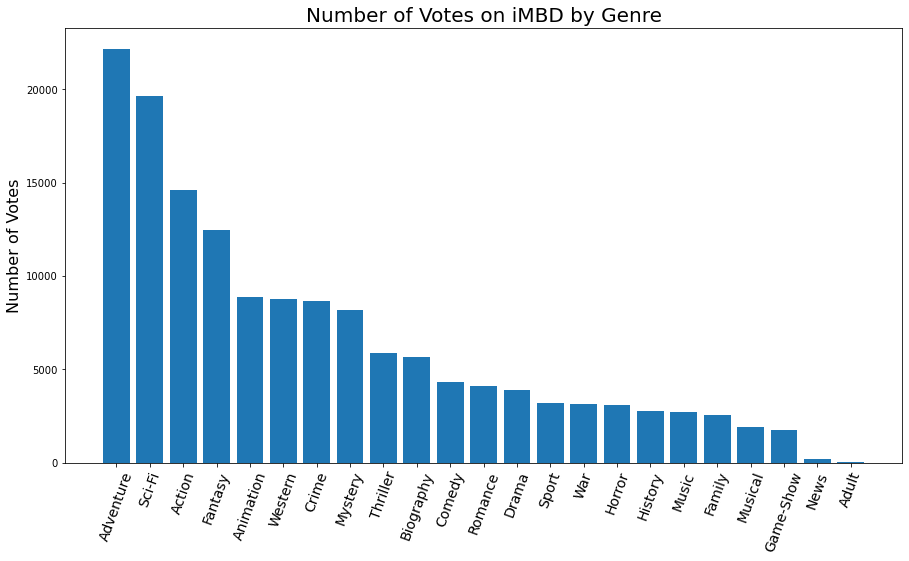

In [75]:
fig,ax = plt.subplots(figsize=(15,8))
ax.bar(ave_genres_dict_ratings.keys(),ave_genres_dict_ratings.values(),color='tab:blue')
ax.set_ylabel('Number of Votes',Fontsize=16)
ax.set_title('Number of Votes on iMBD by Genre',Fontsize=20)
ax.set_xticklabels(list(ave_genres_dict_ratings.keys()), rotation = 70, Fontsize=14);
fig.savefig('../images/number_of_genres.png',bbox_inches='tight')#

## Evaluation

Our results of our analysis indicate that we should hire top directors such as Christopher Nolan, Adrian Molina, Lee Unkrich, Pete Docter and top actor Chris Evans and top actress Jennifer Garner for our action, adventure, or sci-fi film released in May or November. We are confident these combination of recommendations will yield popular movies that are high grossing and receive a high rating among viewers.

## Conclusion

We recommend Microsoft Studios to employ these directors and actors, and take into account the genres we listed along with the release schedule. Although our 